<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

# Data Science Basics in Python Series

## Chapter III: Matplotlib for Univariate Data Visualization in Python 

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 

*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

#### Data Visualization with MatPlotLib in Python for Engineers and Geoscientists 

This is a tutorial for / demonstration of **Univariate Data Visualization in Python**. In Python, a common tool for dealing with Data Visualization is the **Matplotlib Python package**

* Initiated by John Hunter along with many contributors

* Opensource project is a sponsored project of [NumFocus](https://numfocus.org/) 

This tutorial includes the methods and operations that would commonly be required for Engineers and Geoscientists working with Data Visualization for the purpose of:

1. Data Checking and Cleaning
2. Data Mining / Inferential Data Analysis
3. Predictive Modeling

for Data Analytics, Geostatistics and Machine Learning.

##### Data Visualization

Data visualization includes any graphical representation of the data. 

We will demonstate basic concepts with only:

* univariate distributions, histograms

We will start simple and add more complexity and customization.

#### Project Goal

Learn the basics for working with Univariate Data Visualization in Python to build practical spatial data analytics, geostatistics and machine learning workflows.

* Focus on customization and not a survey of available plot times

#### Caveats

I included methods that I have found useful for building my geoscience and engineering workflows for subsurface modeling. I think they should be accessible to most geoscientists and engineers. Certainly, there are more advanced, more compact, more efficient methods to accomplish the same tasks. I tried to keep the methods simple. I appreciate feedback and I will use it to improve this tutorial periodically.

#### Load and Configure the Required Libraries

The following code loads the required libraries and sets a plotting default.

In [1]:
import os                                       # operating system
import numpy as np                              # arrays and matrix math
import pandas as pd                             # tabular data
import matplotlib.pyplot as plt                 # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                  # set axes and grids in the background for all plots
from matplotlib.patches import Rectangle        # drawing shapes on plots

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [2]:
os.chdir("c:/PGE383")                           # set the working directory

#### Loading the Datasets

Let's load a tabular dataset from another .csv file, [spatial_nonlinear_MV_facies_v1.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/spatial_nonlinear_MV_facies_v1.csv)

We cover loading data in these previous **Data Science Basics in Python** lectures, [tabular data](https://www.youtube.com/watch?v=rku5rZxS0AA) and [gridded data](https://www.youtube.com/watch?v=uCRkFwQqdJo)

In [3]:
#table = pd.read_csv('spatial_nonlinear_MV_facies_v1.csv') # load the tabular dataset
table = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v1.csv') # load from Dr. Pyrcz's github account

table = table.iloc[:,1:]                        # remove the first feature (column)
print('The tabular data is a ' + str(type(table)))     
table.head(n=3)

The tabular data is a <class 'pandas.core.frame.DataFrame'>


,Y,Porosity,Perm,AI,Facies
0,10.006391,7.791849,332.802662,4114.121592,1
1,160.265186,16.708829,505.072608,3820.596087,1
2,775.834642,12.430224,404.367985,4180.556194,1


#### Extract the Feature from the Table

I do this for concise and readable code

In [4]:
por = table['Porosity'].values                  # extract porosity feature a a 1D ndarray
print('The por is a ' + str(type(por)) + ' of shape ' + str(por.shape) + '.')

The por is a <class 'numpy.ndarray'> of shape (457,).


#### Histograms

Here's the basic histogram plot.

* Quite a plain plot
* Axes unlabeled

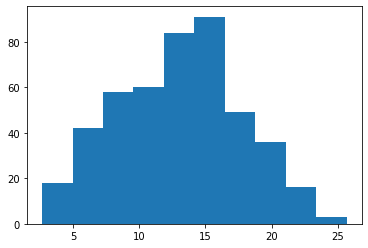

In [5]:
plt.hist(x=table['Porosity'].values)            # basic histogram
plt.show()

#### Design the Plot Space

Let's improve the plot by considering and designing the plot space.
    
* Label the axes (.xlabel(),.ylabel()), always the 'right' answer!
* Add a grid (.grid()) to improve our ability to perform 'ocular inspection'
* We explicity control the plot size, start considering readability
* Consider color (color = string) to separate elements, i.e. foreground and background

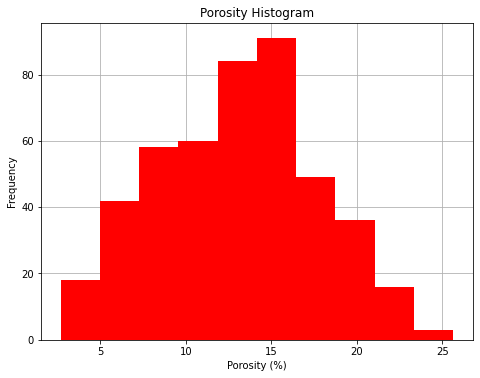

In [6]:
plt.hist(x=por,color='red')                     # histogram
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram') # axes labels
plt.grid()                                      # add grid
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Compose the Elements

Let's think more about how we can combine all the elements to improve clarity

* Outline the histogram bars (edgecolor = string) to separate the binning of the data
* Use transparency (alpha < 1.0) to further improve 'ocular inspection' 

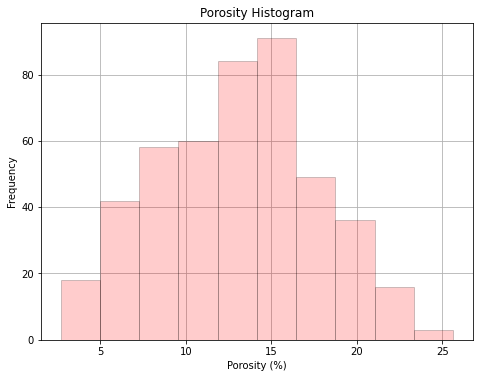

In [7]:
plt.hist(alpha = 0.2,edgecolor='black',x=por,color='red'); plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram') # axes labels
plt.grid()                                      # add grid
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Improve the Consistency Between Elements

Let's improve the consistency of the plot elements.

* Specify the axes' extents (.xlim(),.ylim()) and align yaxes increments with integer frequency
* Only show grid on y and add a minor grid and ticks for readibility

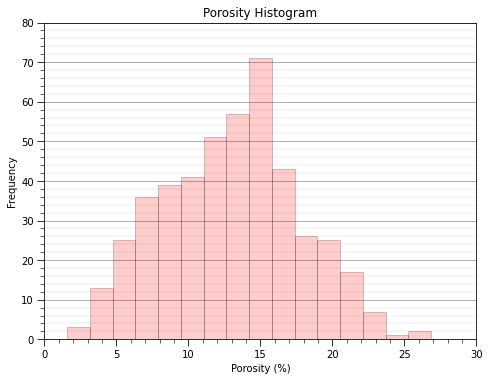

In [8]:
plt.hist(bins=np.linspace(0,30,20),alpha = 0.2,edgecolor='black',x=por,color='red'); plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram') # axes labels
plt.xlim(0,30); plt.ylim(0,80)                      # constrain the axes' extents                           
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Histogram Ultimate Control


Let's further improve the consistency between our plot elements and add hierarchy to the labels

* Specify the histogram bins (bins = list), grid and ticks to align with histogram bins 
* Adjust the font sizes (fontsize = float)

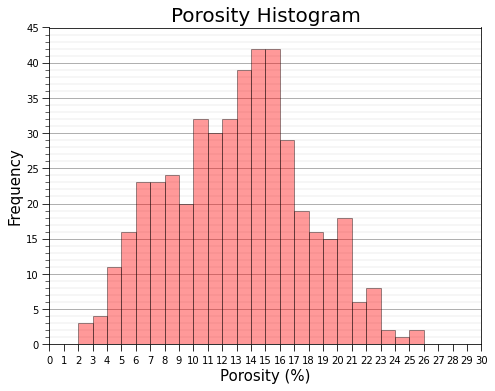

In [9]:
plt.hist(bins=np.linspace(0,30,31),alpha = 0.4,edgecolor='black',x=por,color='red'); plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4); plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grid
plt.xlabel('Porosity (%)',fontsize=15); plt.ylabel('Frequency',fontsize=15); plt.title('Porosity Histogram',fontsize=20) # axes labels
plt.xlim(0,30); plt.ylim(0,45)                      # constrain the axes' extents                           
plt.gca().xaxis.set_major_locator(MultipleLocator(1)) # set the major ticks aligned with the bins
plt.gca().yaxis.set_minor_locator(MultipleLocator(1)); plt.gca().yaxis.set_major_locator(MultipleLocator(5)) # set the minor ticks for integer frequency
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Make a Custom Plot Formatting Function

This is a lot of code, let's make a custom function to format our histogram

* We could make our function more flexible with the addition of function arguments

* This is helpful for concise workflows, especially if similar plots are reused

* We will not discuss the definition and use of **styles**

In [10]:
def format_hist():                                  # function declaration
    plt.xlabel('Porosity (%)',fontsize=15); plt.ylabel('Frequency',fontsize=15); plt.title('Porosity Histogram',fontsize=20) # axes labels
    plt.xlim(0,30); plt.ylim(0,45)                      # constrain the axes' extents                           
    plt.gca().yaxis.grid(True, which='major',linewidth = 1.0) # add y major grid
    plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y minor grid
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_major_locator(MultipleLocator(1)) # set the major ticks aligned with the bins
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1)) # set the minor ticks for integer frequency
    plt.gca().yaxis.set_major_locator(MultipleLocator(5)) # set the minor ticks for integer frequency

#### Histogram with Custom Formatting Function

Let's demonstrate the application of the format function

* Same result with much less code

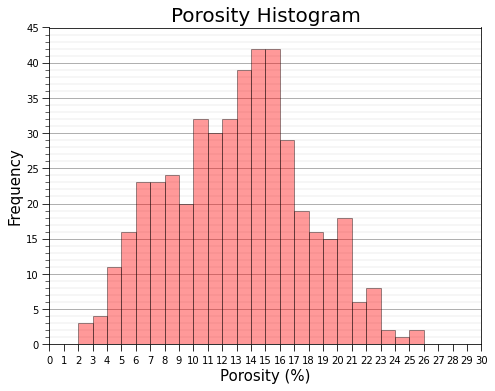

In [11]:
plt.hist(bins=np.linspace(0,30,31),alpha = 0.4,edgecolor='black',x=por,color='red')
format_hist()                                       # insert the custom plot formatting                                    
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Add a Custom Legend

We may want to communicate key statistics with a custom legend by adding shapes and annotation to our plot

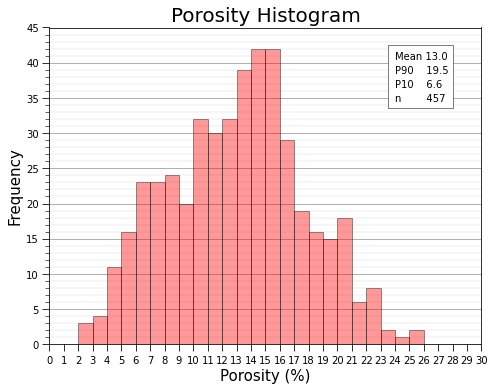

In [12]:
plt.hist(bins=np.linspace(0,30,31),alpha = 0.4,edgecolor='black',x=por,color='red')
format_hist()                                        # insert the custom plot formatting 
plt.gca().add_patch(Rectangle((23.5,33.5),4.5,9,facecolor='white',edgecolor='black',linewidth=0.5))
plt.text(24,40.5,'Mean ' + str(round(np.average(por),1))); plt.text(24,38.5,'P90    ' + str(round(np.percentile(por,90),1)))
plt.text(24,36.5,'P10    ' + str(round(np.percentile(por,10),1))); plt.text(24,34.5,'n        ' + str(por.shape[0]))
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Highlight Data Features

Let's highlight the summary statistics on the plot with lines.

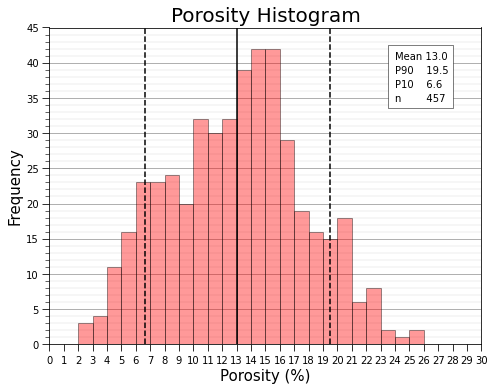

In [13]:
plt.hist(bins=np.linspace(0,30,31),alpha = 0.4,edgecolor='black',x=por,color='red')
format_hist()                                        # insert the custom plot formatting 
plt.gca().add_patch(Rectangle((23.5,33.5),4.5,9,facecolor='white',edgecolor='black',linewidth=0.5)); plt.text(24,40.5,'Mean ' + str(round(np.average(por),1))); plt.text(24,38.5,'P90    ' + str(round(np.percentile(por,90),1))); plt.text(24,36.5,'P10    ' + str(round(np.percentile(por,10),1))); plt.text(24,34.5,'n        ' + str(por.shape[0]))
p10 = np.percentile(por,10); avg = np.average(por); p90 = np.percentile(por,90)
plt.plot([p10,p10],[0.0,45],color = 'black',linestyle='dashed')
plt.plot([avg,avg],[0.0,45],color = 'black')
plt.plot([p90,p90],[0.0,45],color = 'black',linestyle='dashed')
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### From Start to End

Let's compare our original and final plots. 

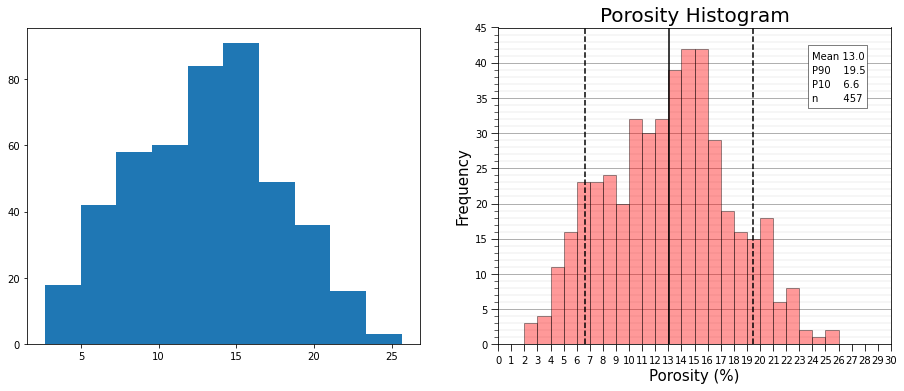

In [14]:
plt.subplot(121)
plt.hist(por)

plt.subplot(122)
plt.hist(bins=np.linspace(0,30,31),alpha = 0.4,edgecolor='black',x=por,color='red')
format_hist()                                        # insert the custom plot formatting 
plt.gca().add_patch(Rectangle((23.7,33.5),4.5,9,facecolor='white',edgecolor='black',linewidth=0.5)); plt.text(24,40.5,'Mean ' + str(round(np.average(por),1))); plt.text(24,38.5,'P90    ' + str(round(np.percentile(por,90),1))); plt.text(24,36.5,'P10    ' + str(round(np.percentile(por,10),1))); plt.text(24,34.5,'n        ' + str(por.shape[0]))
p10 = np.percentile(por,10); avg = np.average(por); p90 = np.percentile(por,90)
plt.plot([p10,p10],[0.0,45],color = 'black',linestyle='dashed')
plt.plot([avg,avg],[0.0,45],color = 'black')
plt.plot([p90,p90],[0.0,45],color = 'black',linestyle='dashed')
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.1); plt.show() # set plot size

#### Multiple Plots

Now let's separate the samples by facies. For more information see the [tabular data](https://www.youtube.com/watch?v=rku5rZxS0AA) lecture.

* Facies 0 - shalestone
* Facies 1 - sandstone

In [15]:
sand = table[table['Facies'] == 1]['Porosity'].values # extract sandstone samples
shale = table[table['Facies'] == 0]['Porosity'].values # extract shalestone samples
print('There are ' + str(len(sand)) + ' sandstone samples.')
print('There are ' + str(len(shale)) + ' shalestone samples.')

There are 360 sandstone samples.
There are 97 shalestone samples.


#### Combine Multiple Plots with Subplots

We can combine plots with subplots.

* the subplot specification is [$n_{rows}$][$n_{columns}$][current index], current index is from 1 to $n_{rows} \times n_{columns}$
* index is from top left accross columns and then down (like reading a page)

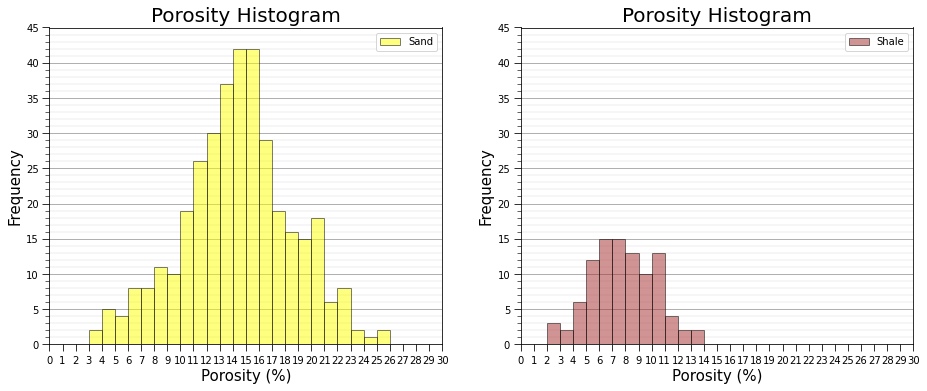

In [16]:
plt.subplot(121)                                    # 1 row, 2 columns, 1st plot
plt.hist(x=sand,color='yellow',alpha=0.5,edgecolor='black',bins=np.linspace(0,30,31),label='Sand') # improved histogram
plt.legend(); format_hist()                         # add a legend and formatting
plt.subplot(122)                                    # 1 row, 2 columns, 2nd plot
plt.hist(x=shale,color='brown',alpha=0.5,edgecolor='black',bins=np.linspace(0,30,31),label='Shale') # improved histogram
plt.legend(); format_hist()                         # add a legend and formatting
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,wspace=0.2,top=1.1); plt.show() # set plot size

#### Combine Multiple Plots with in Same Plot Space

We can combine plots in the same plot space. We do this by adding plots in sequence.

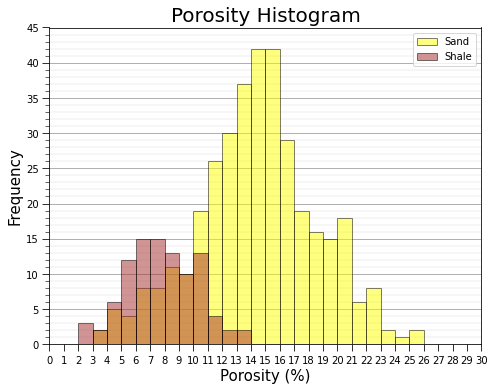

In [17]:
plt.hist(x=sand,color='yellow',alpha=0.5,edgecolor='black',bins=np.linspace(0,30,31),label='Sand') # improved histogram
plt.hist(x=shale,color='brown',alpha=0.5,edgecolor='black',bins=np.linspace(0,30,31),label='Shale') # improved histogram
plt.legend()                                        # add a legend
format_hist()                                       # custom formatting
                                   
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Specifying Plot Order 

We can use the zorder argument to specify the plotting order

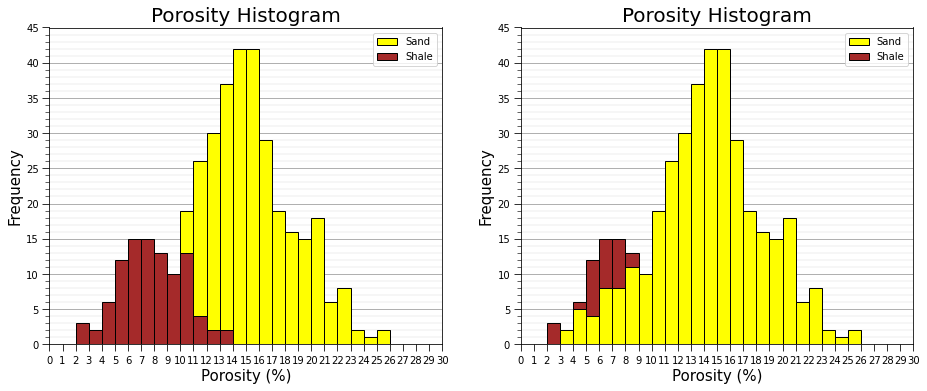

In [18]:
plt.subplot(121)
plt.hist(zorder=1,x=sand,color='yellow',alpha=1.0,edgecolor='black',bins=np.linspace(0,30,31),label='Sand') # improved histogram
plt.hist(zorder=2,x=shale,color='brown',alpha=1.0,edgecolor='black',bins=np.linspace(0,30,31),label='Shale') # improved histogram
plt.legend()                                        # add a legend
format_hist()                                       # custom formatting
 
plt.subplot(122)
plt.hist(zorder=2,x=sand,color='yellow',alpha=1.0,edgecolor='black',bins=np.linspace(0,30,31),label='Sand') # improved histogram
plt.hist(zorder=1,x=shale,color='brown',alpha=1.0,edgecolor='black',bins=np.linspace(0,30,31),label='Shale') # improved histogram
plt.legend()                                        # add a legend
format_hist()                                       # custom formatting
    
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.1,wspace=0.2); plt.show() # set plot size

#### Adding PDF to the Histogram

We can combine multiple types of plots. Here we add the PDFs estimated with kernel density estimation

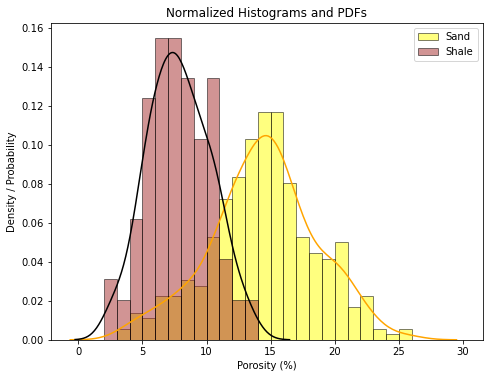

In [19]:
import seaborn as sns                               # plotting
plt.hist(zorder=1,x=sand,color='yellow',alpha=0.5,edgecolor='black',bins=np.linspace(0,30,31),label='Sand',density=True) # improved histogram
plt.hist(zorder=2,x=shale,color='brown',alpha=0.5,edgecolor='black',bins=np.linspace(0,30,31),label='Shale',density=True) # improved histogram
sns.kdeplot(x=sand,color = 'orange',alpha = 0.1,levels = 1)
sns.kdeplot(x=shale,color = 'black',alpha = 0.1,levels = 1)
plt.legend()                                        # add a legend
plt.xlabel('Porosity (%)'); plt.ylabel('Density / Probability'); plt.title('Normalized Histograms and PDFs')
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1,wspace=0.2); plt.show() # set plot size

#### Plotting a Cumulative Distribution Function

It is quite easy to switch from histogram to CDF.

* We set the cumulative argument to True.
* We switch the histtype argument to step or stepfilled.

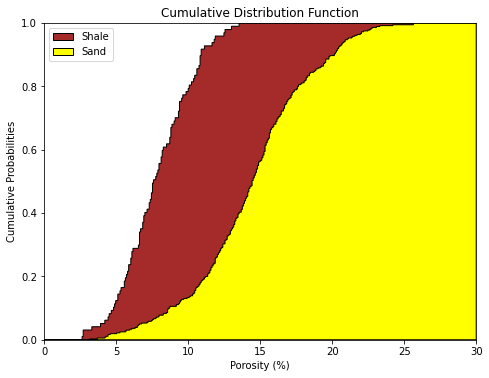

In [20]:
plt.hist(cumulative=True,histtype='stepfilled',x=shale,color='brown',alpha=1.0,edgecolor='black',bins=np.linspace(0,30,400),label='Shale',density=True) # improved histogram
plt.hist(cumulative=True,histtype='stepfilled',x=sand,color='yellow',alpha=1.0,edgecolor='black',bins=np.linspace(0,30,400),label='Sand',density=True) # improved histogram
plt.legend(loc='upper left'); plt.xlim(0,30); plt.ylim(0,1) # add a legend
plt.xlabel('Porosity (%)'); plt.ylabel('Cumulative Probabilities'); plt.title('Cumulative Distribution Function')
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

I hope this we helpful,

Michael

#### More About The Author:

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin